In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
font = {'size'   : 60}
plt.rc('font', **font)

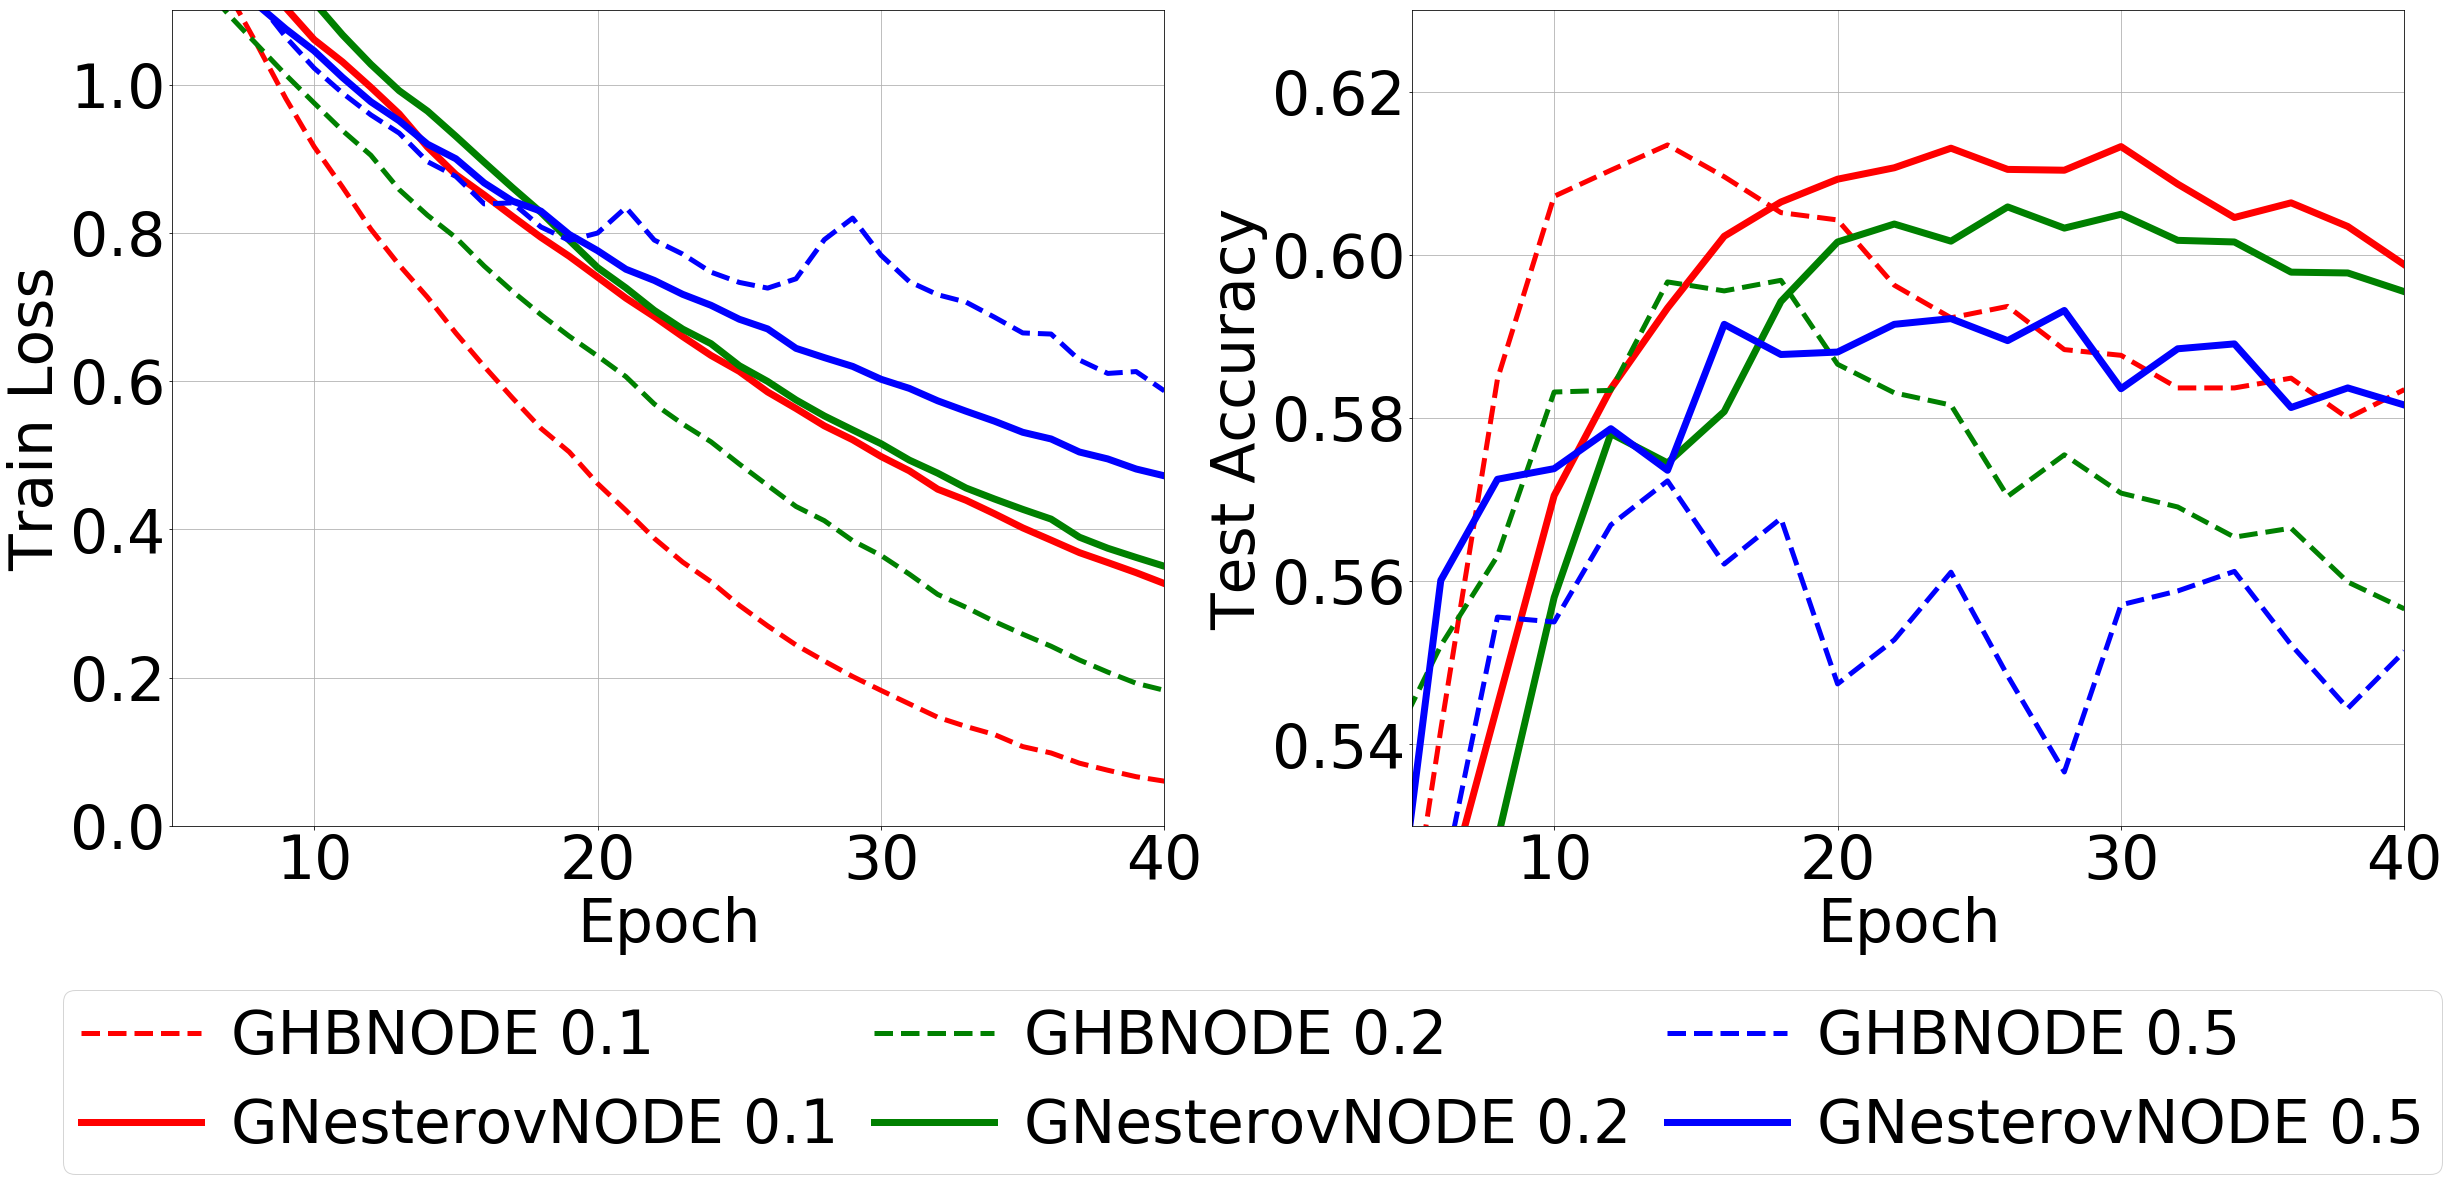

In [4]:
file_names = ["output/cifar/ghbnode_ss/ghbnode_ss_1e-05_0_1.csv",
			  "output/cifar/gnesterovnode_ss/gnesterovnode_ss_1e-05_0_1.csv",
			  "output/cifar/ghbnode_ss/ghbnode_ss_1e-05_0_2.csv", 
			  "output/cifar/gnesterovnode_ss/gnesterovnode_ss_1e-05_0_2.csv",
			  "output/cifar/ghbnode_ss/ghbnode_ss_1e-05_0_5.csv",  
			  "output/cifar/gnesterovnode_ss/gnesterovnode_ss_1e-05_0_5.csv"]

names = ["GHBNODE 0.1",
		 "GNesterovNODE 0.1",
		 "GHBNODE 0.2",
		 "GNesterovNODE 0.2", 
		 "GHBNODE 0.5",
		 "GNesterovNODE 0.5"]

df_names = {}
for i, name in enumerate(names):
	filepath = f"/HeavyBallNODE/{file_names[i]}"
	df = pd.read_csv(filepath, header=None, names=["iter", "loss", "acc", "totalnfe", "forwardnfe", "time/iter", "time_elapsed"])
	df["train/test"] = np.where(pd.isnull(df["forwardnfe"]), "test", "train")
	df["backwardnfe"] = np.where(df["train/test"] == "test", 0, df["totalnfe"] - df["forwardnfe"])
	df["forwardnfe"] = np.where(df["train/test"] == "test", df["totalnfe"], df["forwardnfe"])
	df_names[name] = df

colors = ["red",
		  "red",
		  "green",
		  "green",
	      "blue",
		  "blue"]

line_styles = ['--',
			   '-',
			   '--', 
			   '-',
			   '--',
			   '-']

line_widths = [5, 
			   7,
			   5,
			   7, 
			   5,
			   7]

fig = plt.figure(figsize=(40, 15))
gs = fig.add_gridspec(1, 2, hspace=0.30, wspace=0.25)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

alt_attr_names = ["Train Loss"]
for j, attribute in enumerate(["loss"]):
	for i, name in enumerate(names):
		df_name = df_names[name]
		df_name_train = df_name.loc[df_name["train/test"] == "train"]
		attr_arr = df_name_train[attribute]
		iteration_arr = df_name_train["iter"]
		assert attr_arr.shape[0] <= 40 # max number of iterations
		if attribute == "loss":
			ax1.set_xlim((5, 40))
			ax1.set_ylim((0, 1.1))
		ax1.plot(iteration_arr, attr_arr, line_styles[i], linewidth=line_widths[i], color=colors[i], label=name)
	ax1.set(xlabel="Epoch", ylabel=alt_attr_names[j])
	ax1.grid()

alt_attr_names = ["Test Accuracy"]
for j, attribute in enumerate(["acc"]):
	for i, name in enumerate(names):
		df_name = df_names[name]
		df_name_train = df_name.loc[df_name["train/test"] == "test"]
		attr_arr = df_name_train[attribute]
		iteration_arr = df_name_train["iter"]
		assert attr_arr.shape[0] <= 40 # max number of iterations
		if attribute == "acc":
			ax2.set_xlim((5, 40))
			ax2.set_ylim((0.53, 0.63))
		ax2.plot(iteration_arr, attr_arr, line_styles[i], linewidth=line_widths[i], color=colors[i], label=name)
	ax2.set(xlabel="Epoch", ylabel=alt_attr_names[j])
	ax2.grid()

axbox = ax1.get_position()
_ = plt.legend(bbox_to_anchor=(0.5, axbox.y0-0.35), loc="lower center", 
                bbox_transform=fig.transFigure, ncol=3, handletextpad=0.5, columnspacing=0.6, borderpad=0.3)
plt.savefig(f"cifar_ss.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
